In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import csv
import pprint

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Others
import math
from datetime import datetime,timedelta

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [5]:
links = pd.read_csv('datas/train/links_(table_3).csv')
links= links.set_index('link_id')
routes = pd.read_csv('datas/train/routes_(table_4).csv')

In [50]:
link_trajectories = pd.read_csv('datas/train/20min_avg_travel_timetrajectories(table_5)_training.csv')

In [51]:
link_trajectories.travel_time= link_trajectories.travel_time.map(lambda s:s[1:-1].split(','))

In [52]:
link_trajectories.travel_time = link_trajectories.travel_time.map(lambda l:list(map(float,l)))

In [53]:
link_trajectories['traffic_flow'] = link_trajectories.travel_time.map(sum)  / (20*60)

In [55]:
link_trajectories.head()

,link_id,time_window,avg_travel_time,travel_time,flow,traffic_flow
0,100,2016-07-19 00:00:00,6.75,[6.75],1,0.005625
1,100,2016-07-19 00:20:00,5.15,"[7.44, 2.85]",2,0.008575
2,100,2016-07-19 00:40:00,12.34,[12.34],1,0.010283
3,100,2016-07-19 01:20:00,9.35,[9.35],1,0.007792
4,100,2016-07-19 01:40:00,7.68,"[6.28, 9.07]",2,0.012792


In [58]:
speed_pivot_table = pd.read_json('speed_pivot_table.json',orient='columns')

In [65]:
speed_pivot_table.head()

,100,101,102,103,104,105,106,107,108,109,...,114,115,116,117,118,119,120,121,122,123
2016-07-19 00:00:00,8.59,NaN,NaN,3.08,NaN,8.16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN
2016-07-19 00:20:00,11.26,15.94,NaN,6.50,NaN,9.26,4.39,5.13,8.08,NaN,...,NaN,NaN,17.87,5.03,NaN,NaN,8.11,4.63,1.88,12.55
2016-07-19 00:40:00,4.70,4.70,9.76,6.41,16.17,4.85,24.19,NaN,NaN,16.17,...,NaN,9.75,4.70,NaN,NaN,NaN,NaN,7.87,7.42,NaN
2016-07-19 01:20:00,6.20,7.75,11.27,1.58,11.27,4.63,6.91,7.05,5.49,11.27,...,12.15,11.26,6.74,5.47,8.91,10.34,6.67,7.60,5.87,8.77
2016-07-19 01:40:00,7.55,14.97,13.23,6.59,12.65,3.41,10.00,9.80,9.83,18.72,...,NaN,15.03,12.45,3.28,NaN,NaN,9.68,11.07,5.59,3.63


In [72]:
speed_series = []
for index, row in link_trajectories.iterrows(): 
    speed_series.append(speed_pivot_table[row['link_id']][row['time_window']])

In [79]:
link_trajectories['speed'] = speed_series

In [83]:
link_trajectories.head()

,link_id,time_window,avg_travel_time,travel_time,flow,traffic_flow,speed
0,100,2016-07-19 00:00:00,6.75,[6.75],1,0.005625,8.59
1,100,2016-07-19 00:20:00,5.15,"[7.44, 2.85]",2,0.008575,11.26
2,100,2016-07-19 00:40:00,12.34,[12.34],1,0.010283,4.70
3,100,2016-07-19 01:20:00,9.35,[9.35],1,0.007792,6.20
4,100,2016-07-19 01:40:00,7.68,"[6.28, 9.07]",2,0.012792,7.55


In [77]:
from scipy.stats import pearsonr

In [84]:
pearsonr(link_trajectories.traffic_flow,link_trajectories.speed)

(-0.40135984833146399, 0.0)

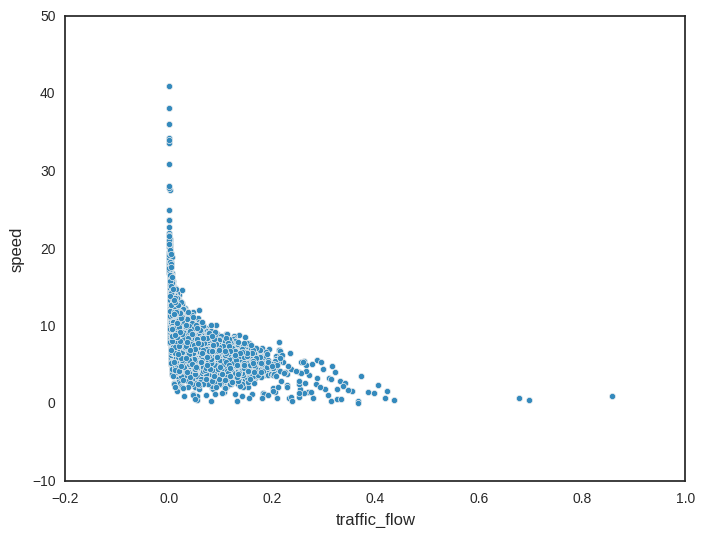

In [126]:
link_trajectories[link_trajectories.link_id == 107].plot(x='traffic_flow',y='speed',kind='scatter')

In [132]:
link_trajectories['traffic_flow_log'] = link_trajectories.traffic_flow.map(lambda x:math.log(0.2*x))

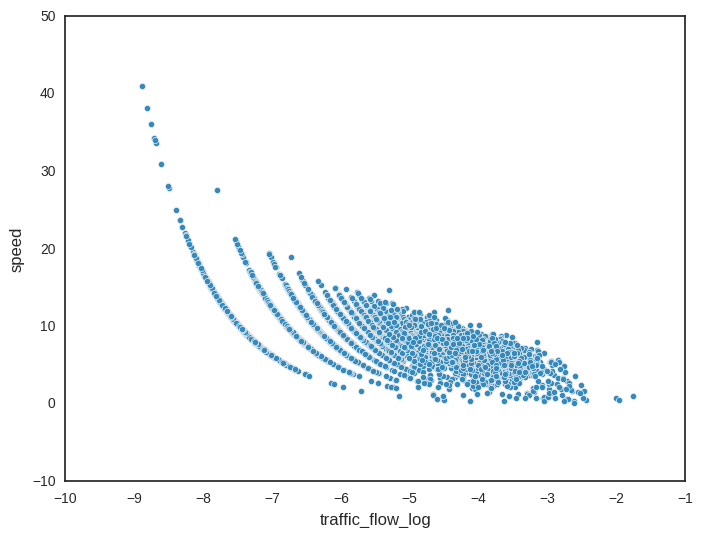

In [133]:
link_trajectories[link_trajectories.link_id == 107].plot(x='traffic_flow_log',y='speed',kind='scatter')

In [106]:
link_trajectories[link_trajectories.link_id == 107]

,link_id,time_window,avg_travel_time,travel_time,flow,traffic_flow,speed
32462,107,2016-07-19 00:20:00,6.63,[6.63],1,0.005525,5.13
32463,107,2016-07-19 01:20:00,4.82,"[8.37, 3.32, 2.77]",3,0.012050,7.05
32464,107,2016-07-19 01:40:00,3.47,"[2.6, 4.1, 3.72]",3,0.008683,9.80
32465,107,2016-07-19 02:20:00,2.56,"[2.64, 2.26, 2.77]",3,0.006392,13.28
32466,107,2016-07-19 02:40:00,3.31,"[2.72, 4.27, 2.94]",3,0.008275,10.27
32467,107,2016-07-19 03:00:00,2.33,[2.33],1,0.001942,14.59
32468,107,2016-07-19 03:20:00,3.85,"[3.75, 3.95]",2,0.006417,8.83
32469,107,2016-07-19 03:40:00,3.51,"[2.05, 5.64, 2.85]",3,0.008783,9.69
32470,107,2016-07-19 04:00:00,2.92,"[2.6, 2.6, 3.55]",3,0.007292,11.64
32471,107,2016-07-19 04:20:00,4.18,"[5.28, 3.0, 4.35, 4.59, 4.02, 3.83]",6,0.020892,8.13


In [135]:
del  link_trajectories['traffic_flow_log']

In [139]:
link_trajectories.to_csv('traffic_flow_link.csv',index=False)

In [138]:
link_trajectories

,link_id,time_window,avg_travel_time,travel_time,flow,traffic_flow,speed
0,100,2016-07-19 00:00:00,6.75,[6.75],1,0.005625,8.59
1,100,2016-07-19 00:20:00,5.15,"[7.44, 2.85]",2,0.008575,11.26
2,100,2016-07-19 00:40:00,12.34,[12.34],1,0.010283,4.70
3,100,2016-07-19 01:20:00,9.35,[9.35],1,0.007792,6.20
4,100,2016-07-19 01:40:00,7.68,"[6.28, 9.07]",2,0.012792,7.55
5,100,2016-07-19 02:00:00,4.54,[4.54],1,0.003783,12.78
6,100,2016-07-19 02:40:00,9.83,"[11.11, 8.55]",2,0.016383,5.90
7,100,2016-07-19 03:40:00,6.60,"[2.36, 12.23, 7.04, 4.77]",4,0.022000,8.79
8,100,2016-07-19 04:00:00,6.90,"[5.27, 8.54]",2,0.011508,8.41
9,100,2016-07-19 04:20:00,5.63,"[4.04, 7.23]",2,0.009392,10.30
